# Welcoming Metrics Model 
*Design by Elizabeth Barron*


# Activity:
- Issue Age: https://chaoss.community/metric-issue-age/
- Issue Response Time: https://chaoss.community/metric-issue-response-time/
- Time to First Response https://chaoss.community/metric-time-to-first-response/ https://chaoss.community/metric-issue-resolution-duration

# Community Culture
- Code of Conduct: https://chaoss.community/metric-code-of-conduct/
- Inclusive Leadership: https://chaoss.community/metric-inclusive-leadership/ 

# Licensing:
- License Coverage https://chaoss.community/metric-license-coverage/
- License Declared https://chaoss.community/metric-license-declared/ 

# Stability:
- CII Best Practices Badge https://chaoss.community/metric-cii-best-practices-badge/
- Test Coverage: https://chaoss.community/metric-test-coverage/
- Bus Factor: https://chaoss.community/metric-bus-factor/
- Committers: https://chaoss.community/metric-committers/
- Elephant Factor: https://chaoss.community/metric-elephant-factor/

# Code
- New contributors
- Change request acceptance rates

In [1]:
import requests
import json
from IPython.display import Image, display
from IPython.display import HTML as html_print
import requests
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.pyplot import figure

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from requests import request

r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/issues-closed-resolution-duration')
# r.json()

## Activity

In [2]:
import requests
r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/issue-throughput')
#r.json()


In [3]:
from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd

r=request(url='http://augur.chaoss.io/api/unstable/repos/25440/issues-closed-resolution-duration', method='get')
e = r.json()
e
data=[]
for response in e: 
  if ( response.get('diffdate')> 79.0 ):
    data.append({
        "repo_id": response.get('repo_id'),
        "repo_name": response.get('repo_name'),
        "diffdate": response.get('diffdate'),
        "gh_issue_number": response.get('gh_issue_number'),
        # "closed_at": response.get('closed_at'),
        # "created_at": response.get('created_at'),
        
    })
df=pd.DataFrame(data)
df.sort_values(by=['diffdate'], inplace=True, ascending=False)
#print(df)

### Issue Age


(10.0, 460.0)

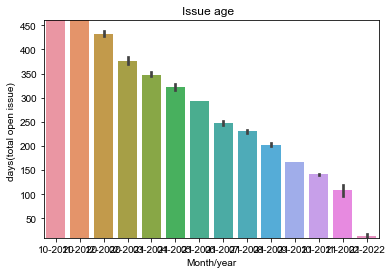

In [4]:
from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# import pandasql as ps
from numpy import count_nonzero
import seaborn as sns
r=request(url='http://augur.chaoss.io/api/unstable/repos/25440/issues-open-age', method='get')
e = r.json()
df=pd.DataFrame(e)
# print(df) 
# df['date'] = pd.DatetimeIndex(df['date']).month
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
df['date'] = df['date'].dt.strftime('%m-%Y')
ax = sns.barplot(x="date", y="open_date", data=df)
ax.set(xlabel="Month/year", ylabel = "days(total open issue) ", title = "Issue age  ")
sns.set(rc = {'figure.figsize':(15,15)})
plt.ylim(10, 460)
#mean issue repo 

### Issue Response Time

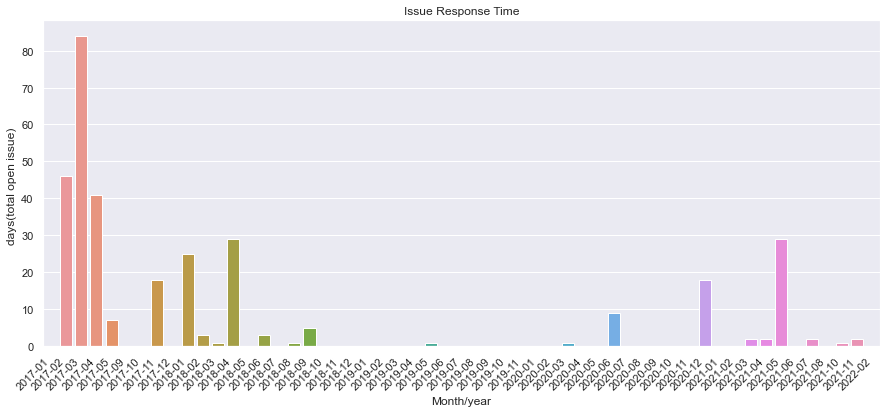

In [5]:
import psycopg2
import pandas as pd 
import sqlalchemy as salc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import json


warnings.filterwarnings('ignore')

with open("Config.json") as config_file:
    config = json.load(config_file)

database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(config['user'], config['password'], config['host'], config['port'], config['database'])

dbschema='augur_data'
engine = salc.create_engine(
    database_connection_string,
    connect_args={'options': '-csearch_path={}'.format(dbschema)})


repolist = pd.DataFrame() 
repo_query = salc.sql.text(f"""select  f.created_at, avg(f.first_response) from 
(
select e.repo_id, date_trunc('month',e.created_at) as created_at, e.first_response  as first_response 
from 
(
SELECT
	d.issue_id,
	d.repo_id,
	gh_issue_number,
	d.created_at as created_at,
	MIN ( first_response ) AS first_response
FROM
	(
	SELECT
		issue_events.created_at as issue_created,
		issues.issue_id,
		issues.repo_id,
		issues.created_at as created_at,
		issues.gh_issue_number AS gh_issue_number,
		SUM ( issue_events.created_at - issues.created_at ) AS first_response 
	FROM
		issue_events,
		issues
		--( SELECT MIN ( issue_events.created_at ) AS created FROM issue_events ) C 
	WHERE
		issue_events.issue_id = issues.issue_id 
		AND issues.closed_at IS NOT NULL 
		AND issues.pull_request_id IS NULL 
	GROUP BY
		issue_events.event_id,
		issues.issue_id,
		issues.created_at,
		issues.gh_issue_number 
	ORDER BY
		gh_issue_number,
		issues.created_at
	) d 
WHERE
	repo_id = 25440 
GROUP BY
	d.issue_id,
	d.repo_id,
	d.gh_issue_number, ---,
	d.created_at 
ORDER BY
	first_response DESC
	) e 
	group by 
	 e.repo_id, e.created_at, e.first_response 
	 ) f 
 group by  f.created_at 

""")

repolist = pd.read_sql(repo_query, con=engine);
#display(repolist)
repolist['avg'] = repolist['avg'].dt.days;
fig, ax = plt.subplots(figsize = (15,6));  
fig = sns.barplot(x = "created_at", y = "avg", data = repolist,ci = None, ax=ax);
ax.set(xlabel="Month/year", ylabel = "days(total open issue) ", title = "Issue Response Time");
x_dates = repolist['created_at'].dt.strftime('%Y-%m').sort_values().unique();
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');


### Issue Time to First Response

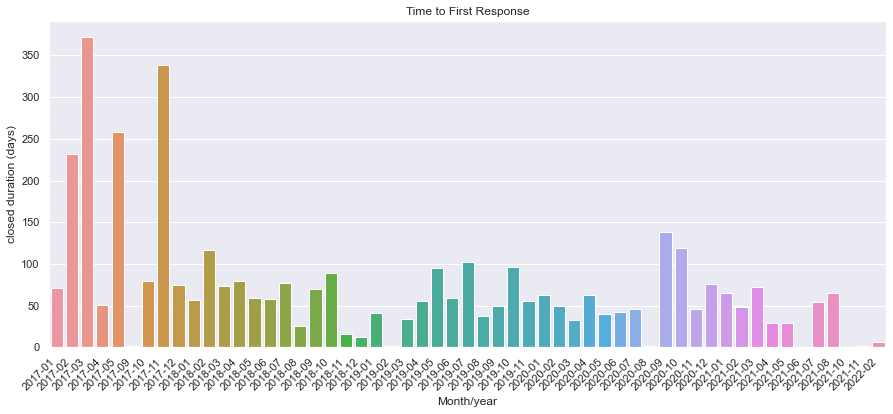

In [6]:
from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import count_nonzero
import seaborn as sns
r=request(url='http://augur.chaoss.io/api/unstable/repos/25440/issues-closed-resolution-duration?period=month', method='get');
e = r.json();
df=pd.DataFrame(e);
created= df['created_at'];
df[['created_at','diffdate']];
created = pd.to_datetime(df.created_at, format='%Y-%m-%d %H:%M:%S');
fig, ax = plt.subplots(figsize = (15,6));
fig = sns.barplot(x = "created_at", y = "diffdate", data = df ,ci = None, ax=ax);
ax.set(xlabel="Month/year", ylabel = "closed duration (days)", title = "Time to First Response");
x_dates = created.dt.strftime('%Y-%m').sort_values().unique();
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');





## Community Culture


### Code of Conduct

In [7]:
import psycopg2
import pandas as pd 
import sqlalchemy as salc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import json


warnings.filterwarnings('ignore')

with open("Config.json") as config_file:
    config = json.load(config_file)

database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(config['user'], config['password'], config['host'], config['port'], config['database'])

dbschema='augur_data'
engine = salc.create_engine(
    database_connection_string,
    connect_args={'options': '-csearch_path={}'.format(dbschema)})


repolist = pd.DataFrame() 
coc = pd.DataFrame() 
coc_query = salc.sql.text(f""" select 
code_of_conduct_file , max(data_collection_date) as date from repo_info
where repo_id = 25440
group by code_of_conduct_file
""")

coc_data = pd.read_sql(coc_query, con=engine);
print(coc_data)

                                code_of_conduct_file                date
0  https://github.com/chaoss/augur/blob/main/CODE... 2022-02-28 23:15:38


### Inclusive Leadership

## Licensing

### License Covered

In [8]:
from termcolor import colored
r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/license-coverage')
r.json()
data = r.json()
df= pd.DataFrame(data)
print(df)

    name  total_files  license_declared_files  coverage
0  augur          857                     564     0.658


### License Count

In [9]:
from termcolor import colored
lcount = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/license-count')
lcount.json()

[{'name': 'augur', 'number_of_license': 167, 'file_without_licenses': True}]

### Licenses Declared

In [20]:
from termcolor import colored
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
r = requests.get('http://augur.chaoss.io/api/unstable/repos/25430/license-declared')
data = r.json()
df= pd.DataFrame(data)
print(df)



   license_id short_name  count
0         142    GPL-3.0    1.0
1         315   GPL-3.0+   94.0


## Stability

### CII Best Practices Badging Status

In [11]:
from termcolor import colored
r = requests.get('http://augur.chaoss.io/api/unstable/repo-groups/10/repos/25440/cii-best-practices-badge')
r.json()


[{'repo_name': 'augur',
  'id': 2788,
  'repo_url': 'https://github.com/chaoss/augur',
  'badge_level': 'passing',
  'tiered_percentage': 107,
  'achieve_silver_status': 'Unmet',
  'achieve_passing_status': 'Met'}]

### Bus Factor

In [15]:
from termcolor import colored
from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd
import plotly.graph_objects as go

r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/top-committers?year=2020&threshold=.8')
data = r.json()
df=pd.DataFrame(data)

fig = go.Figure([go.Bar(x=df['email'], y=df['commits'])])
fig.update_layout(title_text="Bus factor")
fig.update_xaxes(title_text="users")
fig.update_yaxes(title_text="Number of commits")
fig.show()


### Test Coverage

### Committers

In [13]:
from termcolor import colored
r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/lines-changed-by-author')
data = r.json()
df= pd.DataFrame(data)
# print(df)
# df['additions'].nlargest(n=10)
from pandas.api.types import is_numeric_dtype
dfs = []
for col in df.columns:
    top_values = []
    if is_numeric_dtype(df[col]):
        top_values = df[col].nlargest(n=10)
        dfs.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
pd.concat(dfs, axis=1)

,additions,deletions,whitespace
0,253024,325775,41733
1,210647,217242,22914
2,156440,147273,14997
3,136709,134068,12802
4,129766,132010,10712
5,124405,129165,10707
6,117492,126159,6179
7,114478,124636,5587
8,96710,116828,4754
9,95368,111798,4306


In [21]:
import plotly.express as px
r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/lines-changed-by-author')
data = r.json()
df= pd.DataFrame(data)
# df = px.data.iris()
sorted_df1 = df.sort_values(["additions"], ascending=False)
fig1 = px.bar(sorted_df1.head(10), x="cmt_author_email", y="additions"
                ,title="Highest No of Lines added")

sorted_df2 = df.sort_values(["deletions"], ascending=False)
fig2 = px.bar(sorted_df2.head(10), x="cmt_author_email", y="deletions"
                ,title="Highest No of Lines deleted")

sorted_df3 = df.sort_values(["whitespace"], ascending=False)
fig3 = px.bar(sorted_df3.head(10), x="cmt_author_email", y="whitespace"
                ,title="Highest No of whitespace")
fig1.show()
fig2.show()
fig3.show()


## Code

### New Contributors


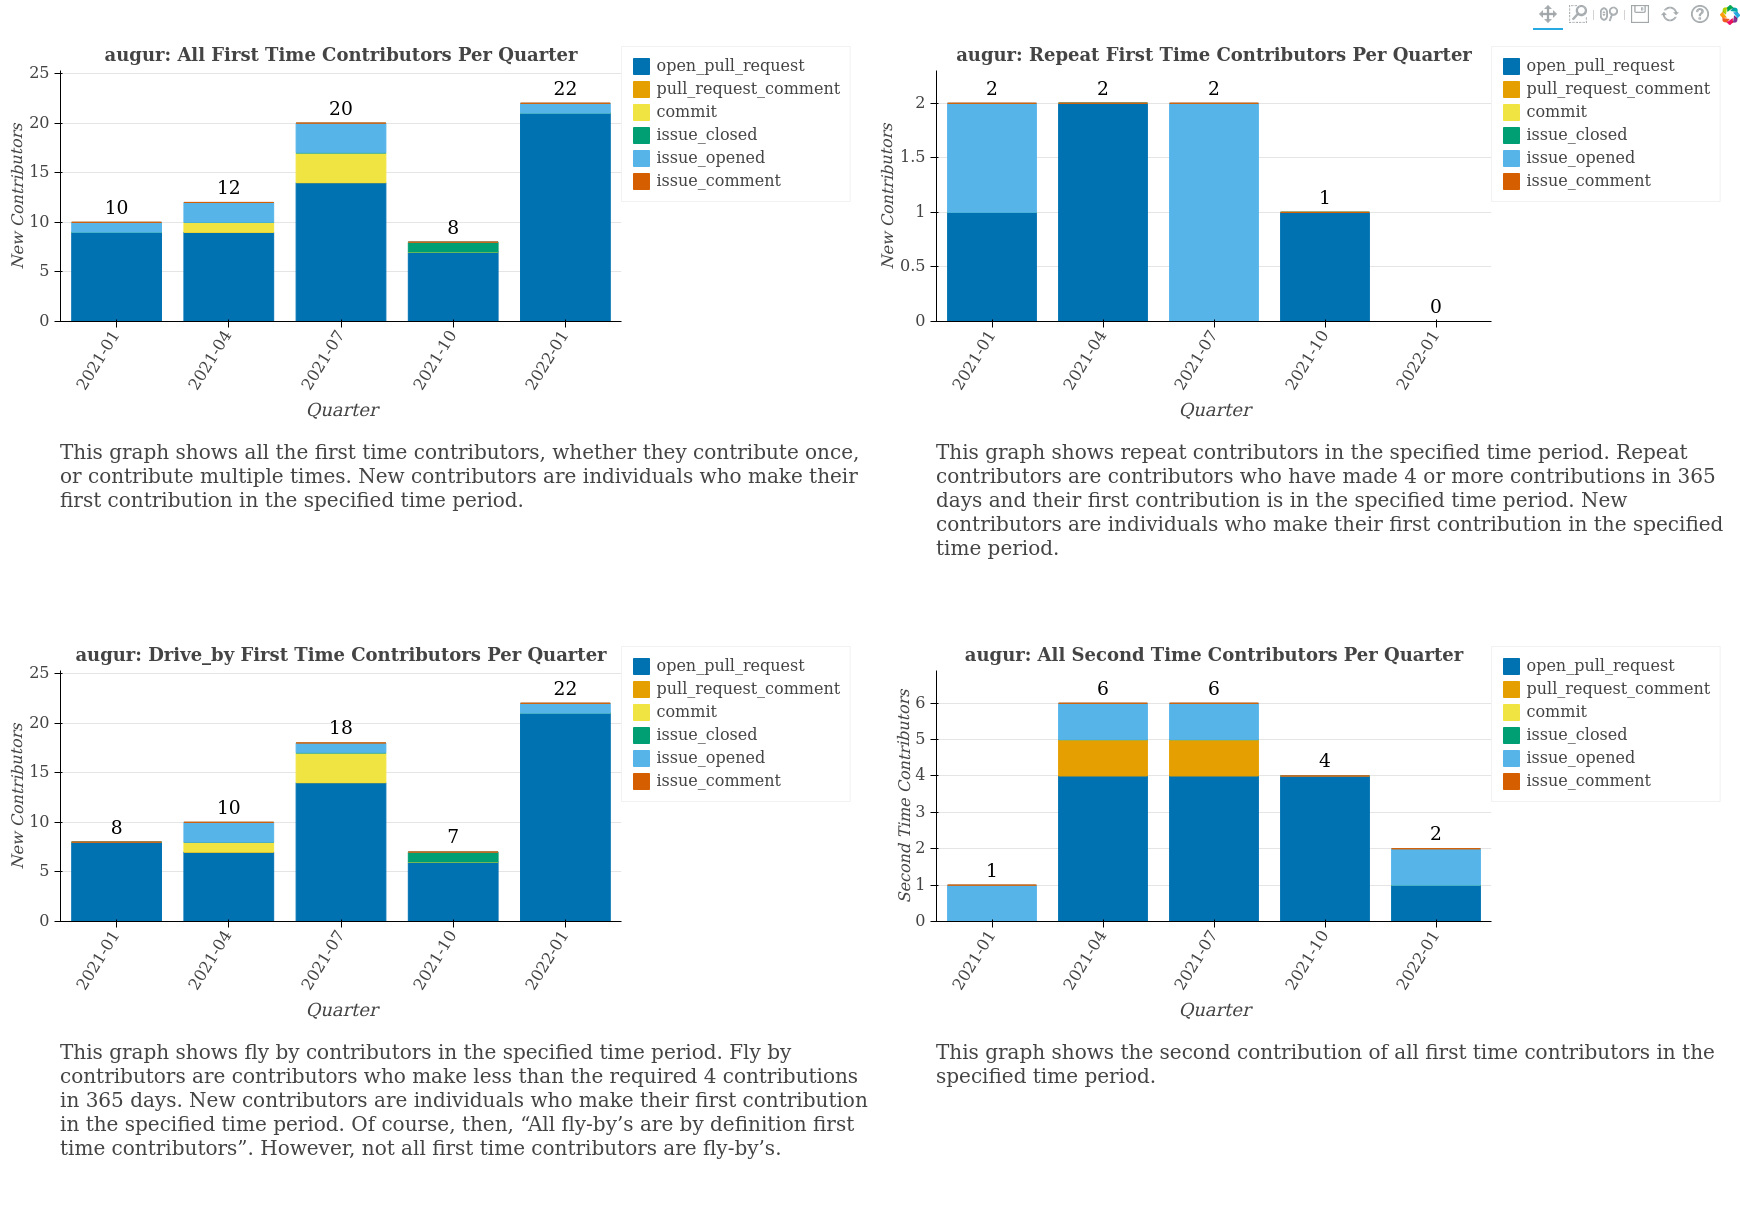

In [16]:
url = "http://augur.chaoss.io/api/unstable/contributor_reports/new_contributors_stacked_bar/?repo_id=25440"
payload = ""
querystring = {
        "api-version":"1.0",
        "format":"png",
        "layer":"basic"
    }
headers = {
    'cache-control': "no-cache"
    }

r = requests.get(url,data=payload, headers=headers, params=querystring, stream=all)

display(Image(r.content))

In [62]:
plt.style.use('seaborn')
import plotly.express as px
r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/contributors-new')
data =r.json()

df= pd.DataFrame(data)
df1= pd.DataFrame(data)

df['date'] = pd.DatetimeIndex(df['date']).year
df1['date'] = pd.DatetimeIndex(df1['date']).month

fig = px.bar(df, x='date', y = 'new_contributors',title="New contributors year wise")
fig.update_xaxes(title_text="years")
fig.update_yaxes(title_text="Number of new contributors")

fig1 = px.bar(df1, x='date', y = 'new_contributors',title='New contributors month wise')
fig1.update_xaxes(title_text="months")
fig1.update_yaxes(title_text="Number of new contributors")

fig.show()

fig1.show()

### Change Request Acceptance Rates

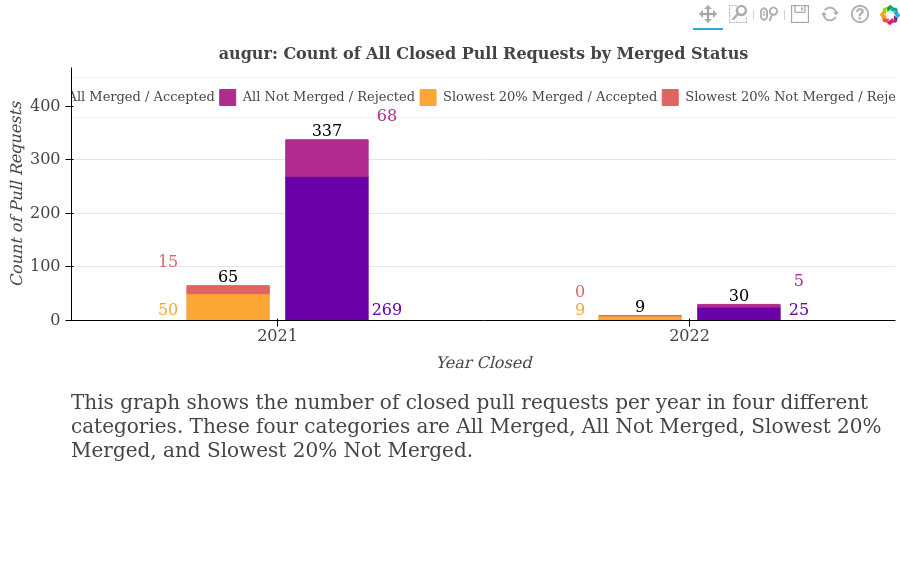

In [18]:
url = "http://augur.chaoss.io/api/unstable/pull_request_reports/PR_counts_by_merged_status?repo_id=25440"
payload = ""
querystring = {
        "api-version":"1.0",
        "format":"png",
        "layer":"basic"
    }
headers = {
    'cache-control': "no-cache"
    }

r = requests.get(url,data=payload, headers=headers, params=querystring, stream=all)

display(Image(r.content))

In [69]:
plt.style.use('seaborn')
import plotly.express as px
r=request(url='http://augur.chaoss.io/api/unstable/repos/25440/pull-request-acceptance-rate', method='get')
e = r.json()
df=pd.DataFrame(e)
fig = px.line(df, x='date', y = 'rate',title="Pull-request-acceptance-rate")
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="Number of pull-request-acceptance-rate")